## Task # 5 - To explore Business Analytics -by Rounak Agarwal

Perform ‘Exploratory Data Analysis’ on the provided dataset
‘SampleSuperstore’
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice

### What is Business Analytics ??

Business analytics (BA) refers to the skills, technologies, practices for continuous iterative exploration and investigation of past business performance to gain insight and drive business planning. Business analytics focuses on developing new insights and understanding of business performance based on data and statistical methods. In contrast, business intelligence traditionally focuses on using a consistent set of metrics to both measure past performance and guide business planning, which is also based on data and statistical methods.

### What is Exploratory Data Analysis ??

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

## Importing all the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot

import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Connecting pyplot with cufflinks for offline mode

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

## Loading the dataset of SampleSuperstore.csv

In [3]:
data = pd.read_csv("SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### shape of the dataset

In [5]:
data.shape

(9994, 13)

### data types of the features present in the dataset

In [6]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking for the null values in the dataset

In [9]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Sales and Profit in different Segment

In [10]:
sales_profit_seg = data.groupby("Segment").sum().loc[:,['Sales','Profit']]
sales_profit_seg = round(sales_profit_seg,3)
sales_profit_seg

,Sales,Profit
Segment,,
Consumer,1161401.345,134119.209
Corporate,706146.367,91979.134
Home Office,429653.149,60298.679


### Sales and Profit in different Region

In [11]:
sales_profit_reg = data.groupby("Region").sum().loc[:,['Sales','Profit']]
sales_profit_reg = round(sales_profit_reg,3)
sales_profit_reg

,Sales,Profit
Region,,
Central,501239.891,39706.362
East,678781.240,91522.780
South,391721.905,46749.430
West,725457.825,108418.449


### Sales and Profit in different Category

In [12]:
sales_profit_catg = data.groupby("Category").sum().loc[:,['Sales','Profit']]
sales_profit_catg = round(sales_profit_catg,3)
sales_profit_catg

,Sales,Profit
Category,,
Furniture,741999.795,18451.273
Office Supplies,719047.032,122490.801
Technology,836154.033,145454.948


### Sales and Profit in different Sub-Category

In [13]:
sales_profit_subcatg = data.groupby("Sub-Category").sum().loc[:,['Sales','Profit']]
sales_profit_subcatg = round(sales_profit_subcatg,3)
sales_profit_subcatg

,Sales,Profit
Sub-Category,,
Accessories,167380.318,41936.636
Appliances,107532.161,18138.005
Art,27118.792,6527.787
Binders,203412.733,30221.763
Bookcases,114879.996,-3472.556
Chairs,328449.103,26590.166
Copiers,149528.030,55617.825
Envelopes,16476.402,6964.177
Fasteners,3024.280,949.518


### Heat map for finding the correlation among the variables.

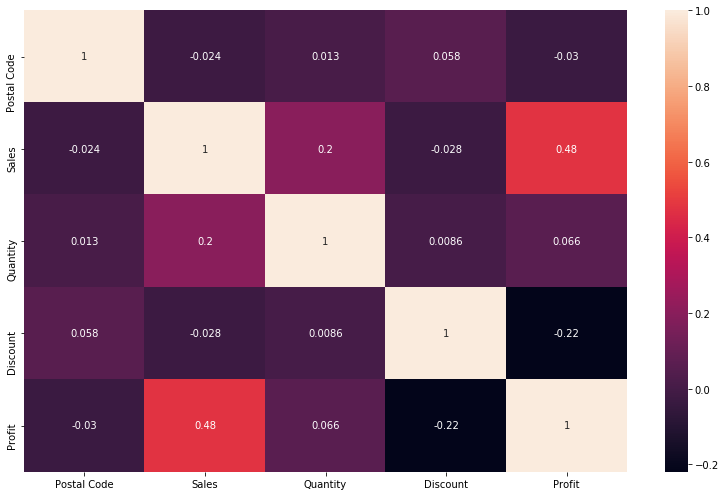

In [14]:
plt.figure(figsize=(11,7))
sns.heatmap(data.corr(),annot=True)
plt.tight_layout()

After observing the heat map for the correlation of the features are:-
1. Sales and discount are inversely related
2. Sales and profit are linearly correlated
3. Quantity is linearly related to Sales, Profit, Dscount
4. Discount and Profit are inversely related

### Visualizing Ship Mode Count

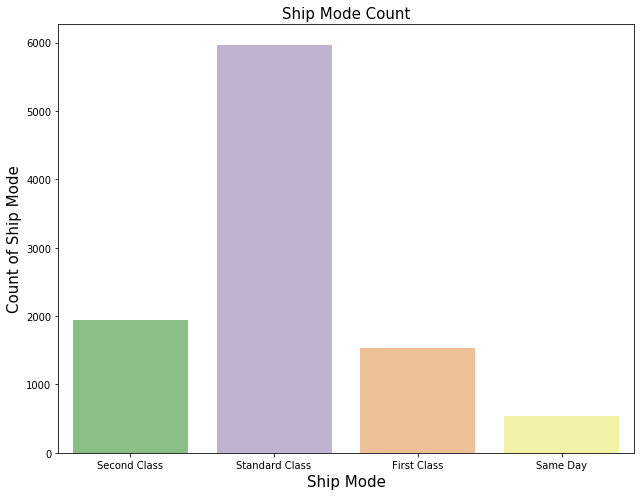

In [35]:
plt.figure(figsize=(9,7))
sns.countplot(x="Ship Mode", data=data, palette='Accent')
plt.title("Ship Mode Count", fontsize=15)
plt.xlabel("Ship Mode",fontsize=15)
plt.ylabel("Count of Ship Mode", fontsize=15)
plt.tight_layout()

### Visualizing Segment Count

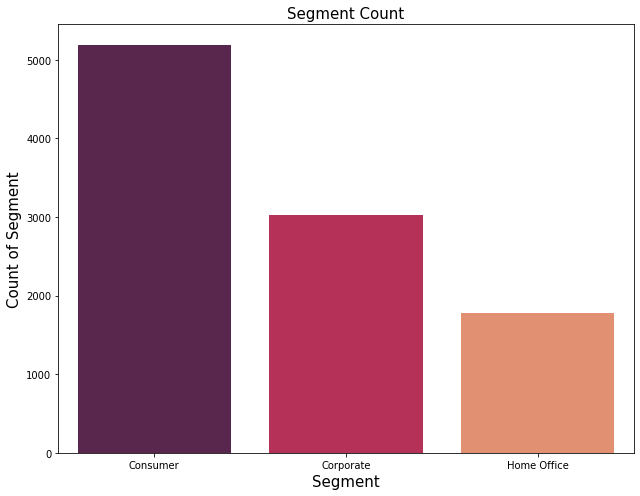

In [36]:
plt.figure(figsize=(9,7))
sns.countplot(x="Segment", data=data, palette='rocket')
plt.title("Segment Count", fontsize=15)
plt.xlabel("Segment",fontsize=15)
plt.ylabel("Count of Segment", fontsize=15)
plt.tight_layout()

### Visualizing Region Count

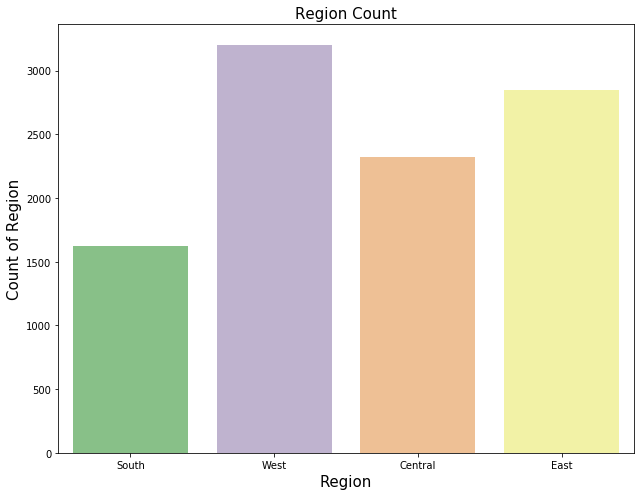

In [37]:
plt.figure(figsize=(9,7))
sns.countplot(x="Region", data=data, palette='Accent')
plt.title("Region Count", fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Count of Region", fontsize=15)
plt.tight_layout()

### Visualizing Sub-Category Count

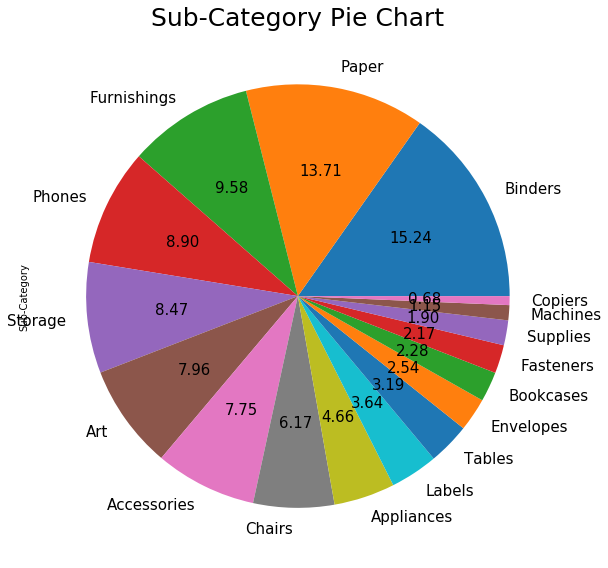

In [18]:
plt.figure(figsize=(10,8))
tp={"fontsize":15}
data['Sub-Category'].value_counts().plot.pie(autopct='%.2f',textprops=tp)
plt.title("Sub-Category Pie Chart", fontsize=25)
plt.tight_layout()

### Visualizing Discount Count

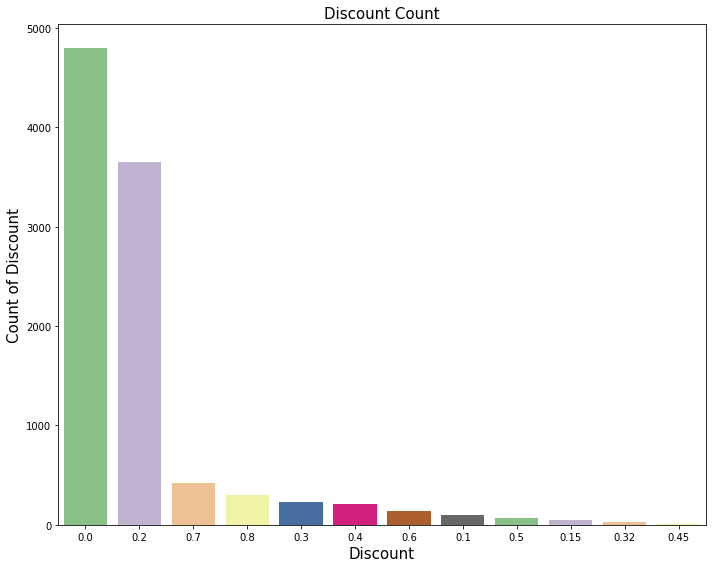

In [19]:
plt.figure(figsize=(10,8))
ch=sns.countplot(x='Discount', data=data, order=data['Discount'].value_counts().index,palette="Accent")
plt.title("Discount Count", fontsize=15)
plt.xlabel("Discount",fontsize=15)
plt.ylabel("Count of Discount", fontsize=15)
plt.tight_layout()

### Visualizing Top 20 State Count

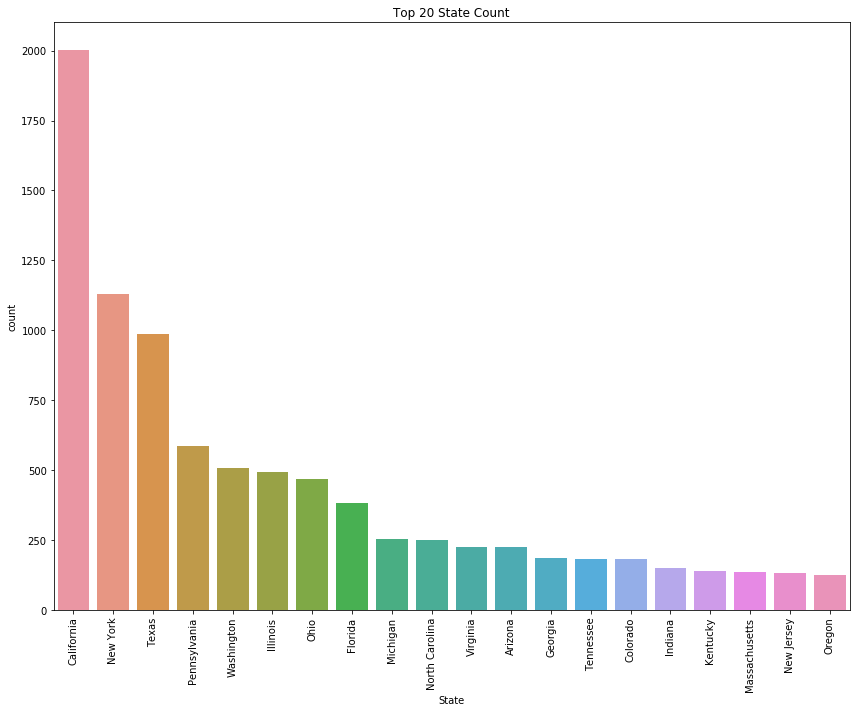

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(x=data['State'], order=(data['State'].value_counts().head(20)).index)
plt.xticks(rotation=90)
plt.title("Top 20 State Count")

plt.tight_layout()

### Visualizing Profit VS Sub-Category

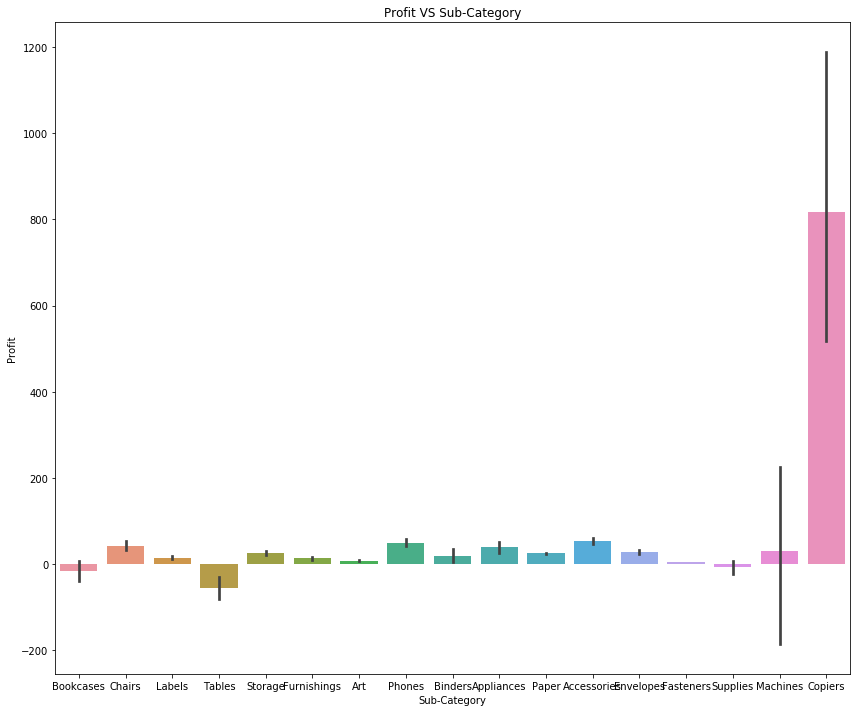

In [21]:
plt.figure(figsize=(12,10))
sns.barplot(x=data['Sub-Category'], y=data['Profit'])
plt.title("Profit VS Sub-Category")
plt.tight_layout()

Here we are seeing that Tables and Bookcases and Supplies are generating some negative profit which has to be look upon for improvement

### Visualizing Profit VS Category

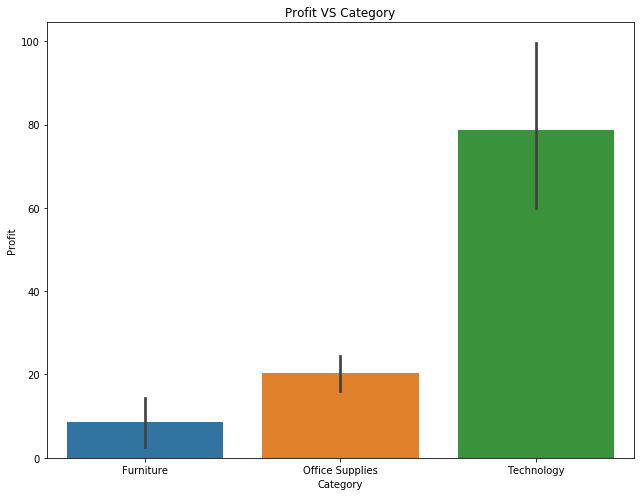

In [22]:
plt.figure(figsize=(9,7))
sns.barplot(x=data['Category'], y=data['Profit'])
plt.title("Profit VS Category")
plt.tight_layout()

Here Technology are generating great profit but we have to focus to increase the  profit for Office Supplies and Furniture

### Visualizing Profit VS Region

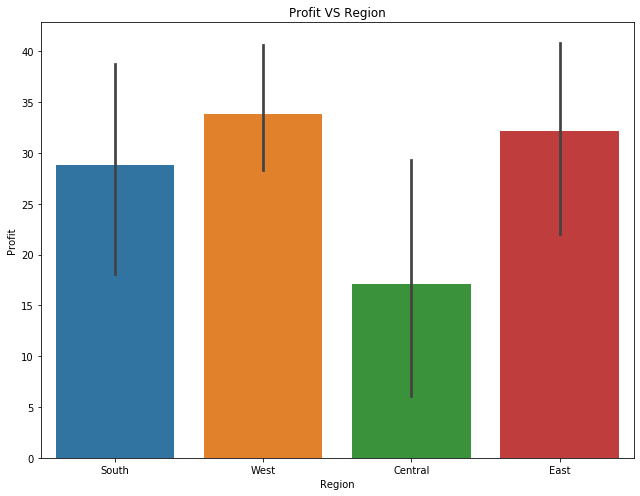

In [23]:
plt.figure(figsize=(9,7))
sns.barplot(x=data['Region'], y=data['Profit'])
plt.title("Profit VS Region")
plt.tight_layout()

Here West and East region are generating good profit, we have to take improvement in the Central Region

### Visualizing the Sales and Profits across Sub-Category

<Figure size 1440x1152 with 0 Axes>

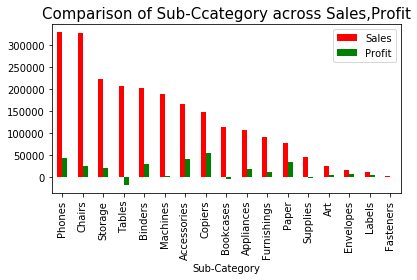

In [24]:
plt.figure(figsize=(20,16))
sub_cat = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
sub_cat.plot(kind='bar', color=['red','green'])
plt.title("Comparison of Sub-Ccategory across Sales,Profit", fontsize=15)

plt.tight_layout()

### Visualizing Discount VS Sales

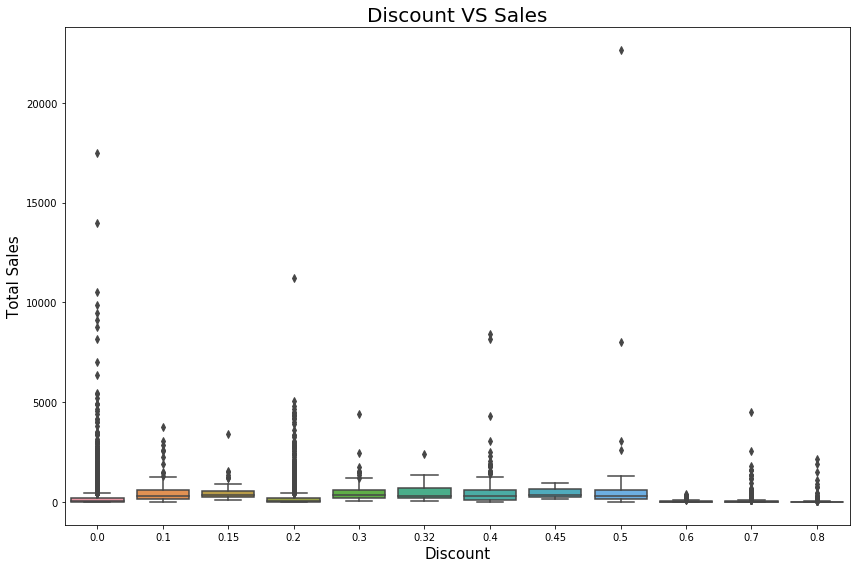

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Discount', y='Sales', data=data)
plt.title("Discount VS Sales", fontsize=20)
plt.xlabel("Discount", fontsize=15)
plt.ylabel("Total Sales", fontsize=15)
plt.tight_layout()

### Visualizing Discount VS Profit

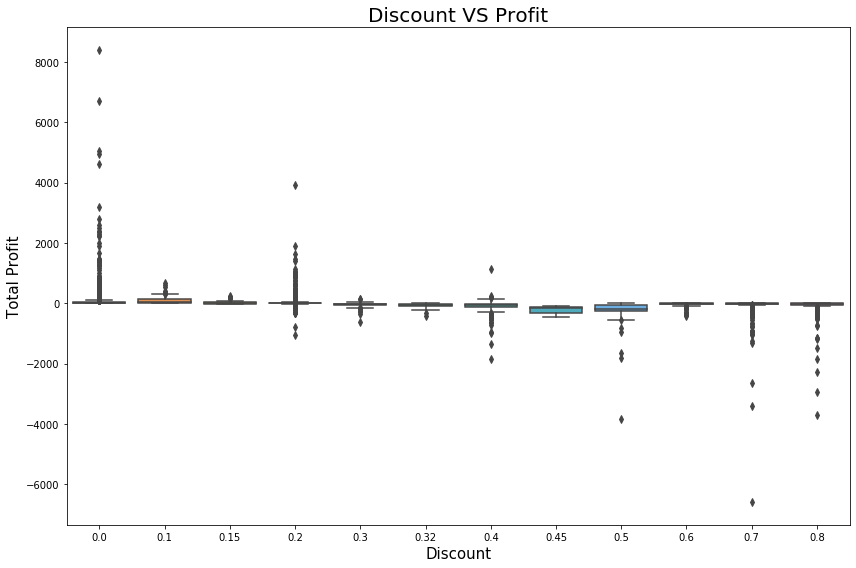

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Discount', y='Profit', data=data)
plt.title("Discount VS Profit", fontsize=20)
plt.xlabel("Discount", fontsize=15)
plt.ylabel("Total Profit", fontsize=15)
plt.tight_layout()

### Visualizing the Ship Mode according the Segment division

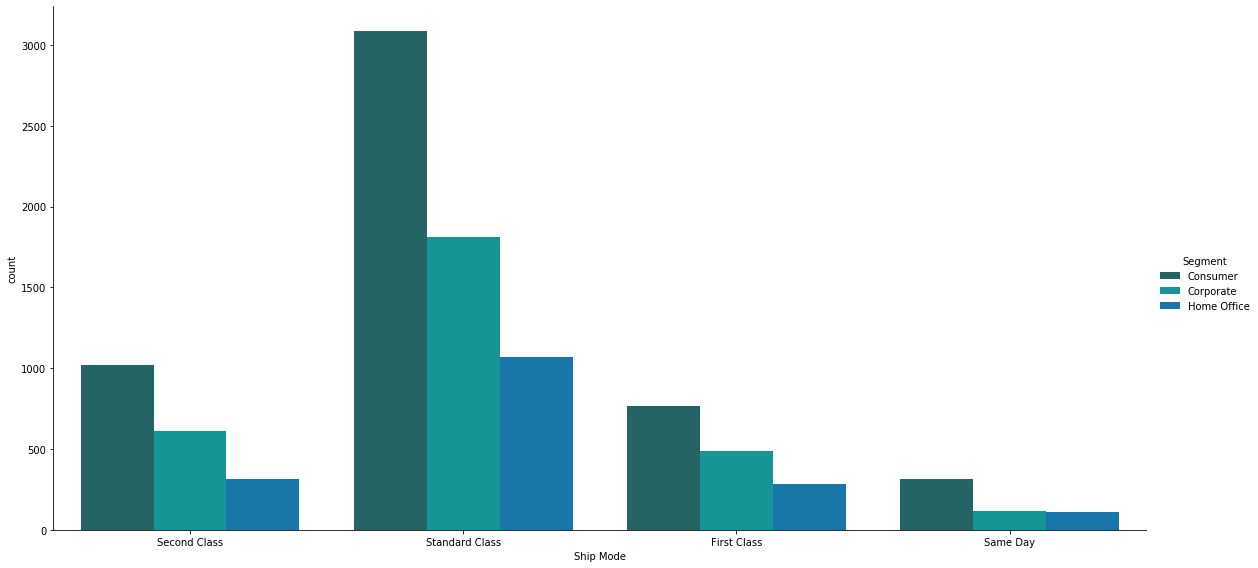

In [34]:
sns.catplot('Ship Mode', hue='Segment', data=data, kind='count', palette='winter_d',height=8,aspect=2)

### Visualizing State Count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

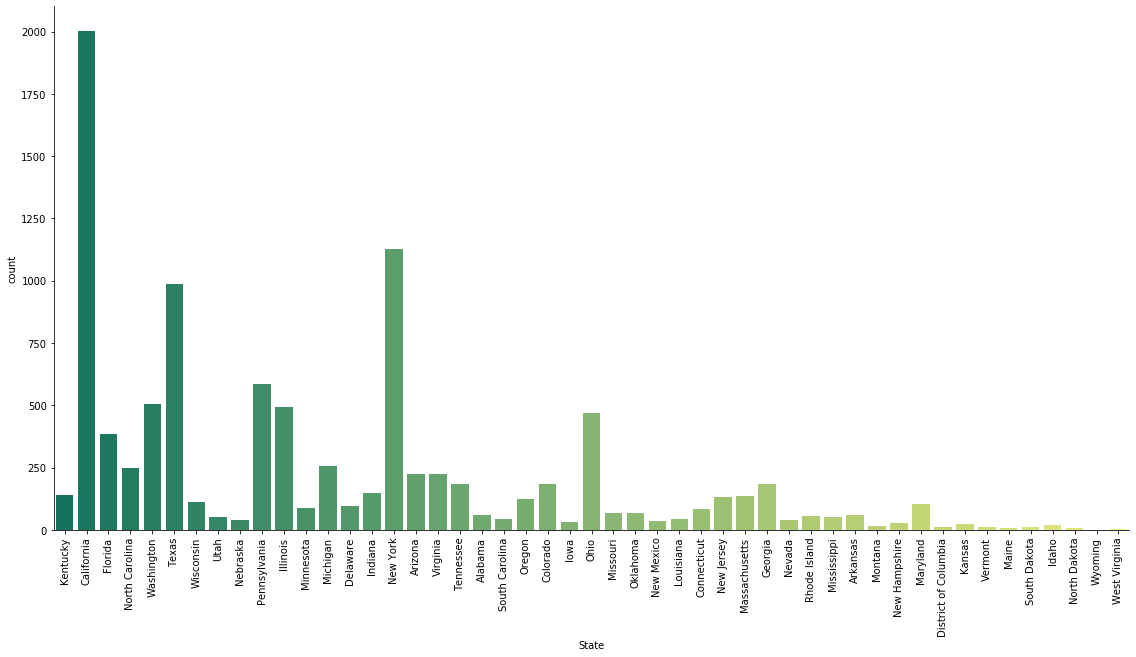

In [33]:
sns.catplot('State', data=data, kind='count', palette='summer',height=8,aspect=2)
plt.xticks(rotation=90)

### Some of the top 10 profitable products

In [38]:
top_profitable_products = data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top_profitable_products.reset_index(drop=True, inplace=True)
top_profitable_products.head(10)

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


## Some of the insights gained after all the visualization are:-

1. Profit made by selling Copiers are good but they have to increase the quantity that are being sold of the copier for generating more profit for the company.
2. Compamy is facing some losses in some top tier states  which should be taken into account for the feature improvement.
3. Office Supplies are great, but the improvement to be made on furniture as mentioned earlier during the Visualization
4. Most importantly Profit and Discount are negatively correlated which should have been taken care otherwise it can provide a backlash.
5. Company is also facing negative profit in the sales of Bookcase and tables as mentioned earlier during their visualization.

## That's All. Thank You!!!!!!!!!!!!!!!!!!!!!!!!!!!!!